In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st

from IPython.display import display
%matplotlib inline

In [2]:
customer_df = pd.read_csv('Wholesale_customers_data.csv')
customer_df.drop(['Channel', 'Region'], axis=1, inplace=True)

In [3]:
customer_samp_df = customer_df.sample(5)

In [4]:
samp_stats = customer_samp_df.describe().T
samp_stats['skew'] = st.skew(customer_samp_df)
samp_stats['kurt'] = st.kurtosis(customer_samp_df)
samp_stats

,count,mean,std,min,25%,50%,75%,max,skew,kurt
Fresh,5.0,18873.0,13833.469377,6468.0,7858.0,14438.0,26373.0,39228.0,0.583131,-1.177095
Milk,5.0,10825.2,15122.968697,1110.0,1431.0,2295.0,12867.0,36423.0,1.164901,-0.303361
Grocery,5.0,9436.0,11288.208472,764.0,1094.0,1733.0,21570.0,22019.0,0.405953,-1.830476
Frozen,5.0,4308.4,1892.840934,1840.0,3220.0,4510.0,5154.0,6818.0,0.003678,-1.083954
Detergents_Paper,5.0,2524.4,3332.537742,49.0,93.0,585.0,4337.0,7558.0,0.729957,-1.126586
Delicatessen,5.0,4452.0,6788.071597,287.0,1543.0,1561.0,2346.0,16523.0,1.455254,0.192918


In [5]:
stats = customer_df.describe().T
stats['skew'] = st.skew(customer_df)
stats['kurt'] = st.kurtosis(customer_df)
stats

,count,mean,std,min,25%,50%,75%,max,skew,kurt
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0,2.552583,11.392124
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0,4.039922,24.376349
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0,3.575187,20.664153
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0,5.887826,54.056180
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0,3.619458,18.780528
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0,11.113534,168.747781


---

# MANY OF THE TOOLS WE WILL USE WILL ASSUME NORMAL DATA

---

You are already familiar with standardization.

## $$Z = \frac{X-\mu}{\sigma}$$

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()
customer_sc = scaler.fit_transform(customer_df)
customer_sc_df = pd.DataFrame(customer_sc, columns=customer_df.columns)

sc_stats = customer_sc_df.describe().T
sc_stats['skew'] = st.skew(customer_sc_df)
sc_stats['kurt'] = st.kurtosis(customer_sc_df)
display(stats)
display(sc_stats)

,count,mean,std,min,25%,50%,75%,max,skew,kurt
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0,2.552583,11.392124
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0,4.039922,24.376349
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0,3.575187,20.664153
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0,5.887826,54.056180
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0,3.619458,18.780528
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0,11.113534,168.747781


,count,mean,std,min,25%,50%,75%,max,skew,kurt
Fresh,440.0,-3.431598e-17,1.001138,-0.949683,-0.702334,-0.276760,0.390523,7.927738,2.552583,11.392124
Milk,440.0,0.000000e+00,1.001138,-0.778795,-0.578306,-0.294258,0.189092,9.183650,4.039922,24.376349
Grocery,440.0,-4.037175e-17,1.001138,-0.837334,-0.610836,-0.336668,0.284911,8.936528,3.575187,20.664153
Frozen,440.0,3.633457e-17,1.001138,-0.628343,-0.480431,-0.318804,0.099464,11.919002,5.887826,54.056180
Detergents_Paper,440.0,2.422305e-17,1.001138,-0.604416,-0.551135,-0.433600,0.218482,7.967672,3.619458,18.780528
Delicatessen,440.0,-8.074349e-18,1.001138,-0.540264,-0.396401,-0.198577,0.104860,16.478447,11.113534,168.747781


# Visualizing the Data

In [ ]:
fig = plt.figure(figsize=(20,6))
for i, col in enumerate(customer_df.columns):
    fig.add_subplot(231+i)
    sns.distplot(customer_df[col], label=col)
    plt.axvline(customer_df[col].mean(), c='red')
    plt.axvline(customer_df[col].median(), c='black')
    plt.legend()

In [ ]:
fig = plt.figure(figsize=(20,6))
for i, col in enumerate(customer_sc_df.columns):
    fig.add_subplot(231+i)
    sns.distplot(customer_sc_df[col], label=col)
    plt.axvline(customer_sc_df[col].mean(), c='red')
    plt.axvline(customer_sc_df[col].median(), c='black')
    plt.legend()

## MANY OF THE TOOLS WE WILL USE WILL ASSUME NORMAL DATA

---

# Deskew the Data

We will look at two common approaches to deskewing data:

- the log transform
- scaling by the Box-Cox test

For purposes of comparison, we will keep both transforms.

We have previously looked at scaling data as a preprocessing step. Note that scaling of data will have no effect on its skewness. 

Another way we can verify this is via a test of skewness.

To perform this test we can use the `scipy.stats.skewtest`.

This function tests the null hypothesis that the skewness of the population that the sample was drawn from is the same as that of a corresponding normal distribution. Remember, a low p-value means reject the null hypothesis i.e the data is skewed!


In [8]:
import scipy.stats as st

In [9]:
for col in customer_sc_df.columns:
    original_col_skewtest = st.skewtest(customer_df[col])
    scaled_col_skewtest = st.skewtest(customer_sc_df[col])
    print("{}\norig skew test: {} \nscaled skew test: {}\n\n".format(col, 
                                                                     original_col_skewtest,
                                                                     scaled_col_skewtest))

Fresh
orig skew test: SkewtestResult(statistic=13.363200236723891, pvalue=9.920555601203282e-41) 
scaled skew test: SkewtestResult(statistic=13.363200236723884, pvalue=9.9205556012042771e-41)


Milk
orig skew test: SkewtestResult(statistic=16.597463367777181, pvalue=7.2698939324027666e-62) 
scaled skew test: SkewtestResult(statistic=16.597463367777177, pvalue=7.2698939324029738e-62)


Grocery
orig skew test: SkewtestResult(statistic=15.727788993926845, pvalue=9.7558667104486924e-56) 
scaled skew test: SkewtestResult(statistic=15.727788993926845, pvalue=9.7558667104486924e-56)


Frozen
orig skew test: SkewtestResult(statistic=19.301887122446967, pvalue=5.1783108829290055e-83) 
scaled skew test: SkewtestResult(statistic=19.301887122446967, pvalue=5.1783108829290055e-83)


Detergents_Paper
orig skew test: SkewtestResult(statistic=15.815137437204189, pvalue=2.4467517316177991e-56) 
scaled skew test: SkewtestResult(statistic=15.815137437204193, pvalue=2.44675173161759e-56)


Delicatessen
or

## Deskew by taking the log of the data

Many times the skew of data can be easily removed by taking the log of the data. Let's do so here.

We will then scale the data after deskewing.

In [10]:
customer_log_df = np.log(customer_df)

scaler.fit(customer_log_df)
customer_log_sc = scaler.transform(customer_log_df)
customer_log_sc_df = pd.DataFrame(customer_log_sc, columns=customer_df.columns)

In [11]:
for col in customer_log_df.columns:
    original_col_skewtest = st.skewtest(customer_df[col])
    scaled_col_skewtest = st.skewtest(customer_sc_df[col])
    original_log_col_skewtest = st.skewtest(customer_log_df[col])
    scaled_log_col_skewtest = st.skewtest(customer_log_sc_df[col])
    print("""{}
    orig:       {} 
    scaled:     {}
    orig log:   {}
    scaled log: {}
    
    """.format(col, 
               original_col_skewtest,
               scaled_col_skewtest, 
               original_log_col_skewtest,
               scaled_log_col_skewtest))

Fresh
    orig:       SkewtestResult(statistic=13.363200236723891, pvalue=9.920555601203282e-41) 
    scaled:     SkewtestResult(statistic=13.363200236723884, pvalue=9.9205556012042771e-41)
    orig log:   SkewtestResult(statistic=-10.321752441398017, pvalue=5.6188111433575958e-25)
    scaled log: SkewtestResult(statistic=-10.321752441398004, pvalue=5.6188111433582377e-25)
    
    
Milk
    orig:       SkewtestResult(statistic=16.597463367777181, pvalue=7.2698939324027666e-62) 
    scaled:     SkewtestResult(statistic=16.597463367777177, pvalue=7.2698939324029738e-62)
    orig log:   SkewtestResult(statistic=-1.9453289163569336, pvalue=0.051735404015913103)
    scaled log: SkewtestResult(statistic=-1.9453289163569198, pvalue=0.051735404015914761)
    
    
Grocery
    orig:       SkewtestResult(statistic=15.727788993926845, pvalue=9.7558667104486924e-56) 
    scaled:     SkewtestResult(statistic=15.727788993926845, pvalue=9.7558667104486924e-56)
    orig log:   SkewtestResult(statisti

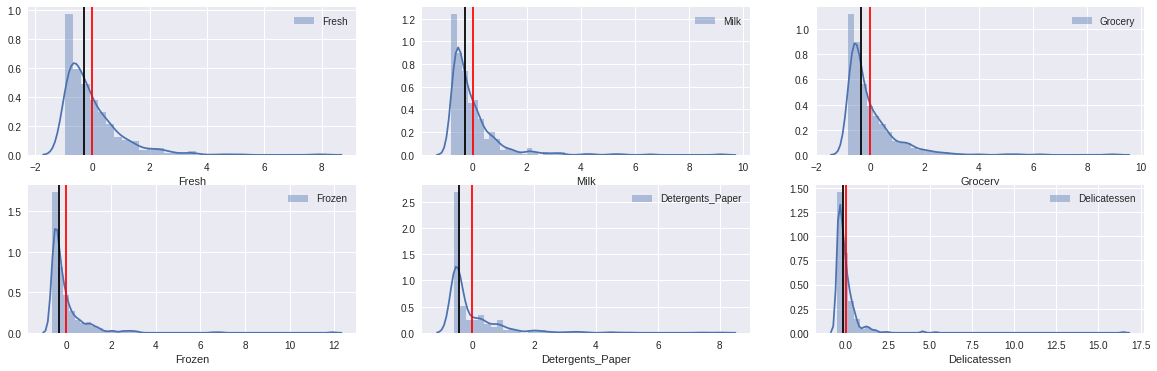

In [12]:
fig = plt.figure(figsize=(20,6))
for i, col in enumerate(customer_sc_df.columns):
    fig.add_subplot(231+i)
    sns.distplot(customer_sc_df[col], label=col)
    plt.axvline(customer_sc_df[col].mean(), c='red')
    plt.axvline(customer_sc_df[col].median(), c='black')
    plt.legend()

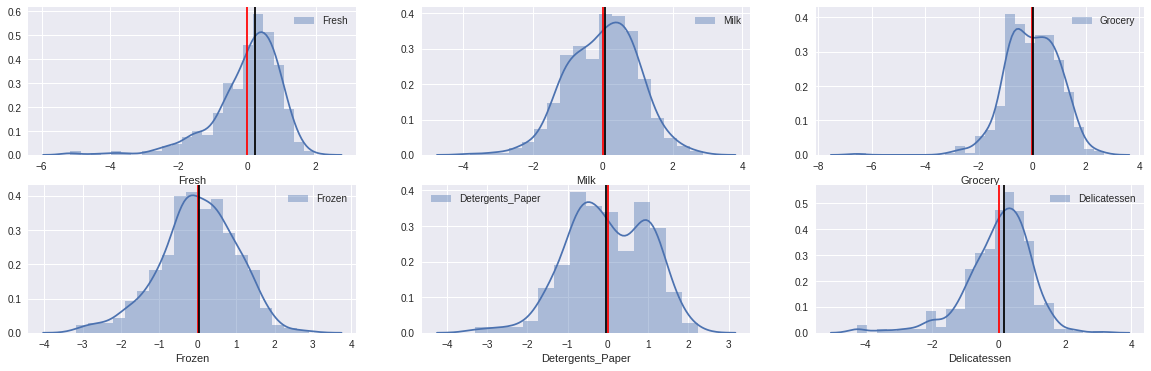

In [13]:
fig = plt.figure(figsize=(20,6))
for i, col in enumerate(customer_log_sc_df.columns):
    fig.add_subplot(231+i)
    sns.distplot(customer_log_sc_df[col], label=col)
    plt.axvline(customer_log_sc_df[col].mean(), c='red')
    plt.axvline(customer_log_sc_df[col].median(), c='black')
    plt.legend()

In [ ]:
customer_log_sc_df.to_pickle('final_log_sc.p')

---

## Deskew by Box-Cox Test

The box cox test works by identifying the optimum power, $\lambda$ to raise the data where

$$\mathbf{x_i}' = \frac{\mathbf{x_i}^\lambda -1}{\lambda}$$

![](https://www.evernote.com/l/AAFyfeEXifNCb6PDsM7FKA6-EZIKf9MQBsgB/image.png)

In [14]:
customer_box_cox_df = pd.DataFrame()
for col in customer_df.columns:
    box_cox_trans = st.boxcox(customer_df[col])[0]
    customer_box_cox_df[col] = pd.Series(box_cox_trans)

In [15]:
scaler.fit(customer_box_cox_df)
customer_box_cox_sc = scaler.transform(customer_box_cox_df)
customer_box_cox_sc_df = pd.DataFrame(customer_box_cox_sc, columns=customer_df.columns)

In [16]:
for col in customer_log_df.columns:
    original_col_skewtest = st.skewtest(customer_df[col])
    scaled_col_skewtest = st.skewtest(customer_sc_df[col])
    original_log_col_skewtest = st.skewtest(customer_log_df[col])
    scaled_log_col_skewtest = st.skewtest(customer_log_sc_df[col])
    original_box_cox_col_skewtest = st.skewtest(customer_box_cox_df[col])
    scaled_box_cox_col_skewtest = st.skewtest(customer_box_cox_sc_df[col])
    print("""{}
    orig:           {} 
    scaled:         {}
    orig log:       {}
    scaled log:     {}
    orig box-cox:   {}
    scaled box-cox: {}
    
    """.format(col, 
               original_col_skewtest,
               scaled_col_skewtest, 
               original_log_col_skewtest,
               scaled_log_col_skewtest, 
               original_box_cox_col_skewtest,
               scaled_box_cox_col_skewtest))

Fresh
    orig:           SkewtestResult(statistic=13.363200236723891, pvalue=9.920555601203282e-41) 
    scaled:         SkewtestResult(statistic=13.363200236723884, pvalue=9.9205556012042771e-41)
    orig log:       SkewtestResult(statistic=-10.321752441398017, pvalue=5.6188111433575958e-25)
    scaled log:     SkewtestResult(statistic=-10.321752441398004, pvalue=5.6188111433582377e-25)
    orig box-cox:   SkewtestResult(statistic=-0.35994737974045543, pvalue=0.71888648448291859)
    scaled box-cox: SkewtestResult(statistic=-0.35994737974044694, pvalue=0.71888648448292491)
    
    
Milk
    orig:           SkewtestResult(statistic=16.597463367777181, pvalue=7.2698939324027666e-62) 
    scaled:         SkewtestResult(statistic=16.597463367777177, pvalue=7.2698939324029738e-62)
    orig log:       SkewtestResult(statistic=-1.9453289163569336, pvalue=0.051735404015913103)
    scaled log:     SkewtestResult(statistic=-1.9453289163569198, pvalue=0.051735404015914761)
    orig box-cox:   

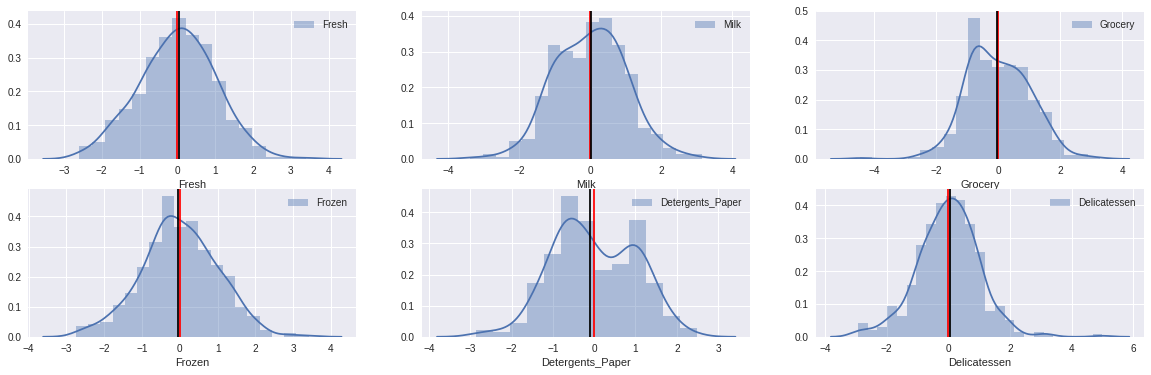

In [17]:
fig = plt.figure(figsize=(20,6))
for i, col in enumerate(customer_box_cox_sc_df.columns):
    fig.add_subplot(231+i)
    sns.distplot(customer_box_cox_sc_df[col], label=col)
    plt.axvline(customer_box_cox_sc_df[col].mean(), c='red')
    plt.axvline(customer_box_cox_sc_df[col].median(), c='black')
    plt.legend()

In [18]:
customer_box_cox_sc_df.to_pickle('final_box_cox_sc.p')